## Day 21: Processing Data with Pandas 

1. Import the JSON file using pandas. View the last 5 rows of 
the DataFrame.  

In [2]:
import pandas as pd
df = pd.read_json("asset_data_analysis.json", orient="split")
df.tail()

,date,products,sales,costs
3,2021-11-07,cars,15900,10910
4,2021-12-06,boats,12087,7087
5,2021-12-09,cars,56897,40447
6,2021-11-10,cars,11879,5879
7,2021-12-06,houses,19345,13451


2. Using pandas, create a copy of the DataFrame and convert 
the "date" column into a pandas datetime format. Set the 
date as the index of the DataFrame. The "date" column 
should not be deleted when it is set as an index. 

In [3]:
df_copy = df.copy()

# Setting date as index
df_copy["date"] = pd.to_datetime(df_copy["date"])
df_copy = df.set_index("date", drop=False)
df_copy.head(30)

,date,products,sales,costs
date,,,,
2021-11-20,2021-11-20,cars,19234,12340
2021-12-12,2021-12-12,boats,87598,67568
2021-12-06,2021-12-06,houses,20989,11999
2021-11-07,2021-11-07,cars,15900,10910
2021-12-06,2021-12-06,boats,12087,7087
2021-12-09,2021-12-09,cars,56897,40447
2021-11-10,2021-11-10,cars,11879,5879
2021-12-06,2021-12-06,houses,19345,13451


3. Using Matplotlib, create a line trend plot of sales and date. 


<function matplotlib.pyplot.show(close=None, block=None)>

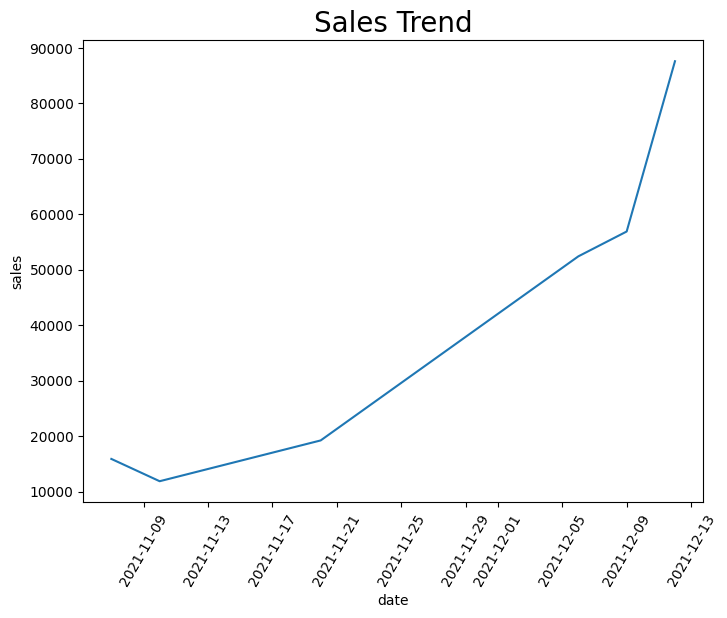

In [24]:
import matplotlib.pyplot as plt 

# grouping by the index(date)
df_grouped = df_copy.groupby(df_copy.index).sum(numeric_only=True)

plt.figure(figsize=(8, 6))
plt.plot(df_grouped.index, df_grouped.sales)
plt.xlabel("date")
plt.xticks(rotation=60)
plt.ylabel("sales")
plt.title("Sales Trend", fontsize=20)
plt.show


4. Using the original DataFrame (question 1), write another 
code to set a hierarchical index, with the date column as the 
outer index and the products column as the inner index. 
Save this as a new variable. 

In [10]:
# Setting hierarchical index 
df2 = df.set_index(["date", "products"])
df2

,,sales,costs
date,products,,
2021-11-20,cars,19234,12340
2021-12-12,boats,87598,67568
2021-12-06,houses,20989,11999
2021-11-07,cars,15900,10910
2021-12-06,boats,12087,7087
2021-12-09,cars,56897,40447
2021-11-10,cars,11879,5879
2021-12-06,houses,19345,13451


5. One of the benefits of setting a multiindex is that it makes 
it easy to filter data. Using the hierarchical index you set in 
question 4, calculate the profit of "Houses" on June 
12, 2021. 

In [11]:
sales_on_12 = df2.loc[( ["12-6-2021"], "houses"),"sales"].sum()


cost_on_12 = df2.loc[( ["12-6-2021"], "houses"),"costs"].sum()


# calculating the difference between cost and sales
profit_on_12 = sales_on_12 - cost_on_12
print("Profit on houses on the 12th of June is", profit_on_12)



Profit on houses on the 12th of June is 14884


6. Use the apply() method to apply a thousand separators to 
the "sales" and "cost" columns (DataFrame from question 
4). 

In [12]:
def thousand_seperator(df, sales, costs):
    df[sales] = df[sales].apply(lambda x: '{:,}'.format(x))
    df[costs] = df[costs].apply(lambda x: '{:,}'.format(x))
    return df2
thousand_seperator(df2, "sales", "costs")


,,sales,costs
date,products,,
2021-11-20,cars,"19,234","12,340"
2021-12-12,boats,"87,598","67,568"
2021-12-06,houses,"20,989","11,999"
2021-11-07,cars,"15,900","10,910"
2021-12-06,boats,"12,087","7,087"
2021-12-09,cars,"56,897","40,447"
2021-11-10,cars,"11,879","5,879"
2021-12-06,houses,"19,345","13,451"


7. Count how many times each product appears in the 
"products" columns. Which product appears the most? 

In [17]:
df3 = df2.groupby(["products"]).size().sort_values(ascending=False)
df3

products
cars      4
boats     2
houses    2
dtype: int64

In [22]:
df3 = df_copy["products"].value_counts(ascending=False)
df3


products
cars      4
boats     2
houses    2
Name: count, dtype: int64